# Lab 2

## Supervised Learning

In this lab, we will be working on creating a model that predicts whether a horse which has colic will survive based on past medical conditions. The dataset is called Horse Colic Dataset. The column 'outcome' determines what happened to the horse, and will be the label. This dataset is more challenging than the last because there are a larger number of NaN values, which are missing values.

## Data Exploration

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('horse.csv')
labels = data['outcome']
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [2]:
data.describe() #Only describes numeric columns, not categorical

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


## Task 1: Querying the dataset

Q1. Just like the last lab, create any queries which will better help you understand the dataset.

In [3]:
#TODO
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
surgery                  299 non-null object
age                      299 non-null object
hospital_number          299 non-null int64
rectal_temp              239 non-null float64
pulse                    275 non-null float64
respiratory_rate         241 non-null float64
temp_of_extremities      243 non-null object
peripheral_pulse         230 non-null object
mucous_membrane          252 non-null object
capillary_refill_time    267 non-null object
pain                     244 non-null object
peristalsis              255 non-null object
abdominal_distention     243 non-null object
nasogastric_tube         195 non-null object
nasogastric_reflux       193 non-null object
nasogastric_reflux_ph    53 non-null float64
rectal_exam_feces        197 non-null object
abdomen                  181 non-null object
packed_cell_volume       270 non-null float64
total_protein            266 non-null

## Task 2: Data Visualization

Check out the pie chart below showing the outcome of different horses.

In [4]:
data.pain

0      extreme_pain
1         mild_pain
2         mild_pain
3         depressed
4               NaN
5         depressed
6         mild_pain
7               NaN
8       severe_pain
9      extreme_pain
10        mild_pain
11        depressed
12        mild_pain
13            alert
14        mild_pain
15     extreme_pain
16      severe_pain
17              NaN
18        depressed
19              NaN
20     extreme_pain
21            alert
22        depressed
23        depressed
24              NaN
25              NaN
26        mild_pain
27              NaN
28              NaN
29            alert
           ...     
269       mild_pain
270    extreme_pain
271    extreme_pain
272    extreme_pain
273             NaN
274    extreme_pain
275     severe_pain
276           alert
277           alert
278       depressed
279           alert
280       depressed
281       depressed
282             NaN
283       mild_pain
284       mild_pain
285     severe_pain
286             NaN
287             NaN


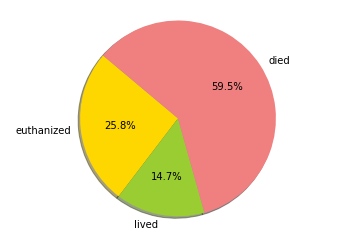

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Data to plot
labels = list(set(data['outcome'].values))
sizes = data.cp_data.groupby(data.outcome).count() #This is a hack, if you have any doubts about this, ask me
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Q2. Make your own visualizations and come up with two important visualizations which split the data. Feel free to use the examples from Lab1, but try to get creative.

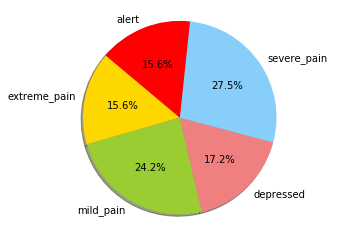

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Data to plot
labels = list(data['pain'].dropna().unique())


sizes = data.cp_data.groupby(data.pain).count() #This is a hack, if you have any doubts about this, ask me

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','black']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [7]:
data_died = data[data['outcome']=='died']

(data_died.cp_data.groupby(data.pain).count().index)

Index(['alert', 'depressed', 'extreme_pain', 'mild_pain', 'severe_pain'], dtype='object', name='pain')

In [8]:
sizes = data.cp_data.groupby(data.pain).count()
sizes.values

array([38, 59, 42, 67, 38])

In [9]:
p1 = plt.bar(ind, dataset[1], width, color='r')
p2 = plt.bar(ind, dataset[2], width, bottom=dataset[1], color='b')

NameError: name 'ind' is not defined

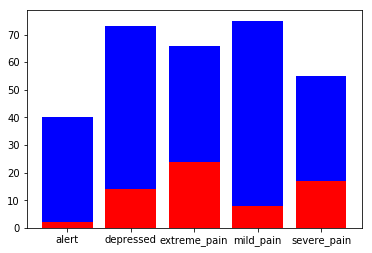

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
 
data_died = data[data['outcome']=='died']
index = list(data_died.cp_data.groupby(data.pain).count().index)
p1 = plt.bar(index, data_died.cp_data.groupby(data.pain).count().values, color='r')
p2 = plt.bar(index,data.cp_data.groupby(data.pain).count().values , bottom=data_died.cp_data.groupby(data.pain).count().values, color='b')
plt.show()

## Preprocessing and Feature Selection

This dataset will be a bit more challenging to preprocess as it has missing values. We will now have 4 steps in preprocessing: 
1. Fill missing values
2. Transformation of skewed features
3. Scaling of numeric attributes
4. One-hot encoding of categorical attributes

## Task 3: Fill missing values

Check out the fillna() function in pandas for filling missing values.

Q3. Fill all NaN values in column 'abdomo_protein' with the mean value of 'abdomo_protein'.

In [11]:
#TODO

mean_value = data['abdomo_protein'].mean() 

data['abdomo_protein'] = data['abdomo_protein'].fillna(mean_value)

data['abdomo_protein']

0      3.039604
1      2.000000
2      3.039604
3      5.300000
4      3.039604
5      3.039604
6      3.039604
7      3.039604
8      3.039604
9      2.200000
10     3.600000
11     3.039604
12     3.039604
13     3.039604
14     2.000000
15     3.039604
16     4.700000
17     3.039604
18     3.039604
19     3.039604
20     3.039604
21     3.039604
22     3.039604
23     3.039604
24     3.039604
25     3.039604
26     3.900000
27     1.300000
28     3.039604
29     3.039604
         ...   
269    3.039604
270    2.000000
271    3.039604
272    3.039604
273    3.039604
274    3.039604
275    1.000000
276    3.039604
277    3.039604
278    2.500000
279    3.039604
280    3.039604
281    3.039604
282    3.039604
283    7.000000
284    3.039604
285    3.039604
286    3.039604
287    3.039604
288    5.300000
289    3.039604
290    3.039604
291    3.039604
292    2.000000
293    3.039604
294    3.039604
295    3.300000
296    3.039604
297    3.400000
298    1.000000
Name: abdomo_protein, Le

Q4. Fill in NaN values for any other columns which you feel you may use later on as features, or do it for all features if you aren't sure(hectic work).  

In [12]:
#TODO
data['respiratory_rate'] = data['respiratory_rate'].fillna(data['respiratory_rate'].mean())
data['rectal_temp'] = data['rectal_temp'].fillna(data['rectal_temp'].mean())
data['nasogastric_reflux_ph'] = data['nasogastric_reflux_ph'].fillna(data['nasogastric_reflux_ph'].mean())
data['total_protein']= data['total_protein'].fillna(data['total_protein'].mean())
data['packed_cell_volume']= data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean())

## Task 4: Transformation of Skewed Continuous Features

Sometimes continuous features are distributed such that the values reside near one central value, but there are sometimes a non-trivial amount of larger or smaller values which may negatively affect the learning algorithm. Therefore it is common to perform a transformation such as log transformation on these features.
Let us take an example:

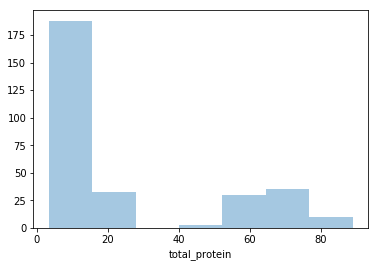

In [13]:
sns.distplot(data['total_protein'].fillna(data['total_protein'].mean()),kde = False)

plt.show()

We can see that most of values lie between 0-20, however there are a large amount of data points which are greater than 40. We need to transform this feature.

Q5. Carry out a log transformation on total_protein by applying natural log on all values.

In [14]:
#TODO

data['total_protein'] = np.log(data['total_protein'])

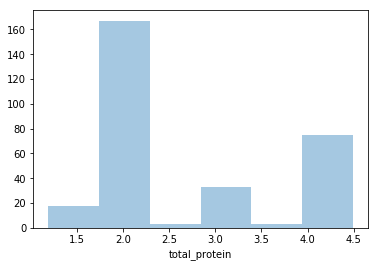

In [15]:
sns.distplot(data['total_protein'].fillna(data['total_protein'].mean()),kde = False)

plt.show()

Q6. Check out distributions of other features, and if they are observably skewed, feel free to apply log transformation on them as well. Just keep in mind that if the features can hold a value of 0, then you may have to shift the distribution by a small value before applying the log. Also assign them to a new dataframe new_data like above.

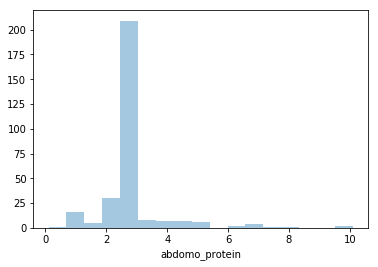

In [16]:
#TODO
sns.distplot(data['abdomo_protein'].fillna(data['abdomo_protein'].mean()),kde = False)

plt.show()


## Task 5: Scaling of numeric attributes

Q7. Select an appropriate number of numeric features for training, and scale them. You can use the MinMaxScaler like last time, or you can try out other scalers like StandardScaler(Z-score normalization), and assign them to numeric_variables. One example is given below:

In [17]:
'''Here is the answer: You should NEVER do anything which leaks information about your testing data BEFORE a split.  If you normalize before the split, then you will use the testing data to calculate the range or distribution of this data which leaks this information also into the testing data.  And that "contaminates" your data and will lead to over-optimistic performance estimations on your testing data.  This is by the way not just true for normalization but for all data preprocessing steps which change data based on all data points including also feature selection.  Just to be clear: This contamination does not have to lead to over-optimistic performance estimations but often it will.

 

What you SHOULD do instead is to create the normalization only on the training data and use the preprocessing model coming out of the normalization operator.  This preprocessing model can then be applied like any other model on the testing data as well and will change the testing data based on the training data (which is ok) but not the other way around.'''

'Here is the answer: You should NEVER do anything which leaks information about your testing data BEFORE a split.  If you normalize before the split, then you will use the testing data to calculate the range or distribution of this data which leaks this information also into the testing data.  And that "contaminates" your data and will lead to over-optimistic performance estimations on your testing data.  This is by the way not just true for normalization but for all data preprocessing steps which change data based on all data points including also feature selection.  Just to be clear: This contamination does not have to lead to over-optimistic performance estimations but often it will.\n\n \n\nWhat you SHOULD do instead is to create the normalization only on the training data and use the preprocessing model coming out of the normalization operator.  This preprocessing model can then be applied like any other model on the testing data as well and will change the testing data based on t

In [18]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
data['respiratory_rate'] = scaler1.fit_transform(data[['respiratory_rate']].fillna(data['respiratory_rate'].mean()))
#The above syntax can be a little confusing. Any doubts please ask me

data['respiratory_rate'].head()

0   -0.155463
1   -0.660914
2   -0.408189
3    3.382695
4    0.286807
Name: respiratory_rate, dtype: float64

In [19]:
#TODO

from sklearn.preprocessing import RobustScaler

scaler2 = RobustScaler()

numeric_variables = scaler2.fit_transform(data[['packed_cell_volume','respiratory_rate','total_protein','rectal_temp','nasogastric_reflux_ph']])

numeric_variables

array([[-0.09090909, -0.13793103,  0.0421569 ,  0.55230126,  0.        ],
       [ 0.36363636, -0.68965517,  1.16349011,  1.71896792,  0.        ],
       [-1.18181818, -0.4137931 , -0.06739997,  0.21896792,  0.        ],
       ..., 
       [ 1.27272727,  0.        , -0.06022208, -1.11436541,  0.        ],
       [ 0.36363636, -0.4137931 , -0.12086346, -2.78103208,  0.        ],
       [-0.90909091, -0.68965517,  1.0106226 , -1.61436541,  0.        ]])

## Task 6:One-hot encoding of categorical attributes

In [20]:
numeric_variables.shape

(299, 5)

In learning algorithms, values are expected to be numeric. However, categorical attributes can provide a lot of information to the model. So the way we incorporate these attributes is by carrying out one-hot encoding.

Q8. Using the function pd.get_dummies(), one-hot encode an appropriate number of categorical variables. Remember that if there are only 2 possible categorical values for the attribute, then you can just set the value of the field to 0 if it holds one value or 1 if not.(Use list comprehension for this).

In [21]:
data.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [22]:
#TODO


categorical_variables = pd.get_dummies(data[['temp_of_extremities','age']])
categorical_variables.head()

,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,age_adult,age_young
0,0,1,0,0,1,0
1,0,0,0,0,1,0
2,0,0,1,0,1,0
3,1,0,0,0,0,1
4,0,0,0,0,1,0


## Task 7: Encoding the labels

One more step before we move on is converting the categorical labels in 'outcome' to numbers. This is called label encoding, and is done with the help of LabelEncoder. Check the sklearn documentation example for help.

Q9. Using LabelEncoder, encode 'outcome'.

In [23]:
from sklearn.preprocessing import LabelEncoder
#TODO

le = LabelEncoder()  #Instantiate the encoder
data['outcome'] = le.fit_transform(data['outcome'])  #Fit and transform the labels using labelencoder
data['outcome'].head()


0    0
1    1
2    2
3    0
4    0
Name: outcome, dtype: int64

## Model Selection and Training

## Task 7: Model Selection

As you may notice, in the last lab, we had extracted the validation set before any preprocessing. However we will be doing something different this time. 

Q9. Select 2 classifiers and instantiate them, don't train them. Just remember to import them. A few examples are given below:
- DecisionTreeClassifier
- GaussianNB
- RandomForestClassifier
- svm.SVC (Support Vector Machine)
- Any other classifier, look them up!

In [24]:
#TODO

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

clf1 = RandomForestClassifier()
clf2 = SVC()

## Task 8: Cross Validation and Performance Analysis

We will be doing a k-fold cross validation on the dataset to get a better generalized accuracy.

In [25]:
categorical_variables.as_matrix()

array([[0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 0],
       ..., 
       [1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0]], dtype=uint8)

In [43]:
#Combining all features into one matrix, and setting labels array
X = np.concatenate((numeric_variables,categorical_variables.as_matrix()),axis = 1)
y = data['outcome'].as_matrix() 

Q9. Calculate the 6-fold cross validation score using the cross_val_score() function. Parameter 'cv' defines the number of folds.

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score?

In [28]:
from sklearn.model_selection import cross_val_score
#TODO
scores1 = cross_val_score(estimator=clf1,X=X,y=y,cv=6,n_jobs=2)              #Use cross_val_score for clf1
av_score1 = sum(scores1)/6            #Calculate average score for clf1

scores2 = cross_val_score(estimator=clf2,X=X,y=y,n_jobs=2,cv=6)             #Use cross_val_score for clf2
av_score2 = sum(scores2)/6            #Calculate average score for clf2

print("Average Cross Validation Score for clf1: {}".format(av_score1))
print("Average Cross Validation Score for clf2: {}".format(av_score2))

Average Cross Validation Score for clf1: 0.6557744764572496
Average Cross Validation Score for clf2: 0.6554285047352274


## Task 9 : Hyperparameter Tuning

How do we optimize the classifier in order to produce the best results? We need to tune the model by varying various hyperparameters. We can use GridSearchCV to simplify the whole process.

Q10. For GridSearchCV, carry out the following steps(We will only do this for one classifier, so choose one of your previous classifiers):
- Initialize a new classifier object
- Create a dictionary of parameters you wish to tune.(e.g. parameters = {'param_name':[list of values]})
- Note: Avoid tuning the max_features parameter of your learner if that parameter is available!
- Use make_scorer to create an accuracy_score object
- Perform grid search on the classifier clf using the 'scorer', and store it in grid_obj.
- Fit the grid search object to the training data (X_train, y_train), and store it in grid_fit.

In [29]:
from sklearn.metrics import make_scorer
make_scorer?

In [30]:
from sklearn.model_selection import GridSearchCV
GridSearchCV?

In [61]:
y = y.reshape(-1,)
print(y.shape)

(299,)


In [46]:
print(X.shape)

(299, 11)


In [54]:
y.shape

(299, 1)

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

print(y_train.shape)
#TODO
clf = RandomForestClassifier()        #Initialize the classifier object

parameters = {'n_estimators':[10,32,64,128,256,1024],'max_depth':[1,2,5,10,20,30,60,40]}    #Dictionary of parameters

scorer = make_scorer(score_func=accuracy_score)        #Initialize the scorer using make_scorer

grid_obj = GridSearchCV(estimator = clf,param_grid = parameters,scoring = scorer,cv=5)         #Initialize a GridSearchCV object with above parameters,scorer and classifier

grid_fit = grid_obj.fit(X_train,y_train)        #Fit the gridsearch object with X_train,y_train
print(grid_fit.best_params_)
print(grid_fit.best_score_)
best_clf = grid_fit.best_estimator_         #Get the best estimator. For this, check documentation of GridSearchCV object

unoptimized_predictions = (clf.fit(X_train,y_train)).predict(X_test)      #Using the unoptimized classifiers, generate predictions
optimized_predictions = best_clf.predict(X_test)        #Same, but use the best estimator

acc_unop = accuracy_score(y_test,unoptimized_predictions)       #Calculate accuracy for unoptimized model
acc_op = accuracy_score(y_test,optimized_predictions)         #Calculate accuracy for optimized model

print("Accuracy score on unoptimized model:{}".format(acc_unop))
print("Accuracy score on optimized model:{}".format(acc_op))

(200,)
{'max_depth': 20, 'n_estimators': 256}
0.675
Accuracy score on unoptimized model:0.6767676767676768
Accuracy score on optimized model:0.6262626262626263


Q11. We have learnt some more methods to boost our accuracy. Try messing around with the above functions and bring up model performance.